/var/folders/_h/zqzyskvx2hd4w984syj7bb3m0000gn/T/ipykernel_88665/3731677142.py:64: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, pad=0.02)


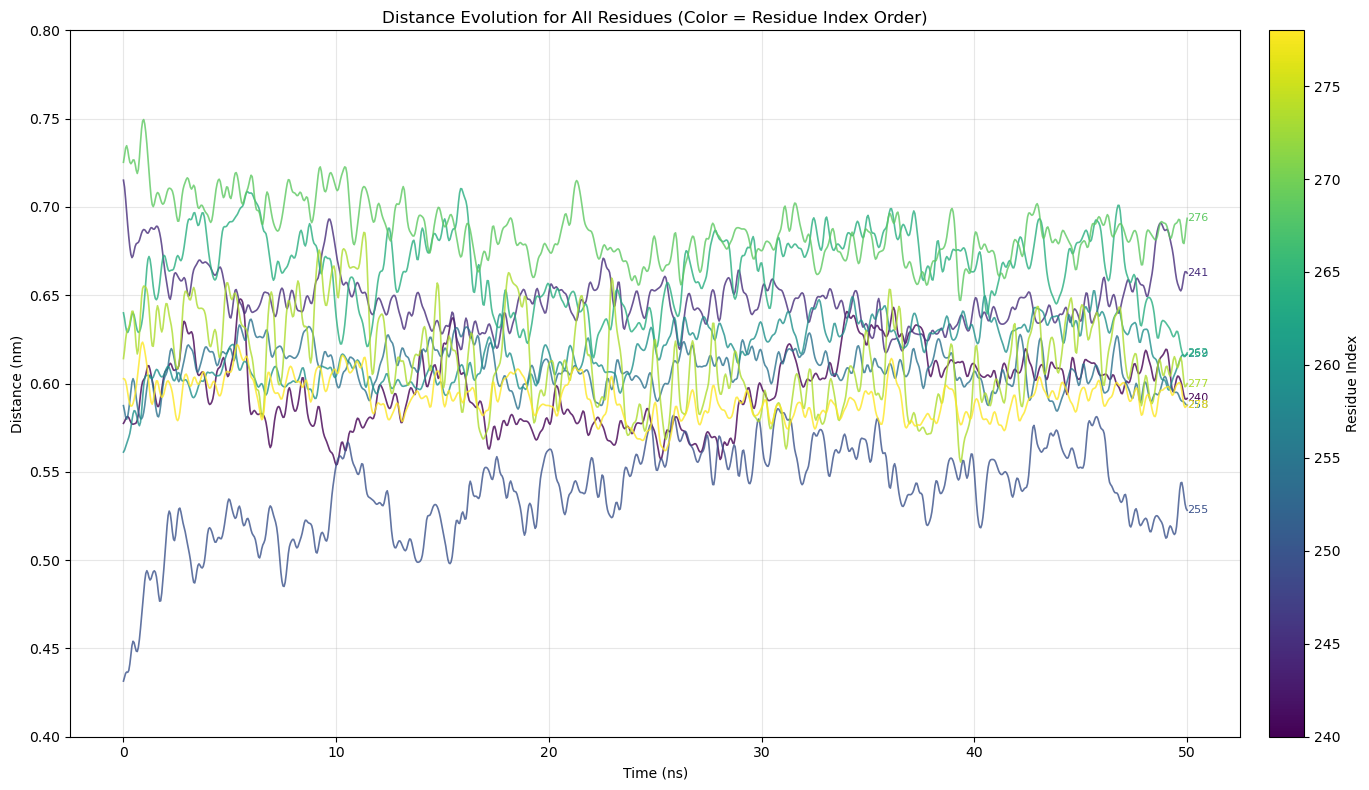

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
from scipy.ndimage import gaussian_filter1d

# Load the data
csv_path = "../../data/MD/chimeras_ADP/module2/h_abtub_adpx2_gtpx2_mgx4_distance.csv"
df = pd.read_csv(csv_path)

# Remove columns (except time) where any value exceeds 0.7
time_col = df.columns[0]
cols_to_keep = [time_col] + [col for col in df.columns if col != time_col and df[col].max() <=0.8]
df = df[cols_to_keep]

# Extract residue columns (assume all except time_col)
residue_cols = [col for col in df.columns if col != time_col]

# Try to extract residue indices from column names (e.g., "Kinesin_163_Distance_nm")
def extract_index(col):
    # Try to extract integer from the column name (find first integer group)
    import re
    match = re.search(r'(\d+)', col)
    if match:
        return int(match.group(1))
    else:
        return None

residue_indices = [extract_index(col) for col in residue_cols]

# Only keep columns with valid residue indices
valid = [i for i, idx in enumerate(residue_indices) if idx is not None]
residue_cols = [residue_cols[i] for i in valid]
residue_indices = [residue_indices[i] for i in valid]

# Sort by residue index for color mapping
sorted_pairs = sorted(zip(residue_indices, residue_cols))
sorted_indices, sorted_cols = zip(*sorted_pairs)

# Create a color map (e.g., viridis) for the number of residues
cmap = colormaps['viridis']
colors = [cmap(i / (len(sorted_cols)-1)) for i in range(len(sorted_cols))]

plt.figure(figsize=(15, 8))
for i, col in enumerate(sorted_cols):
    # Apply Gaussian filter with sigma=2
    smoothed = gaussian_filter1d(df[col].values, sigma=2)
    plt.plot(df[time_col], smoothed, label=str(sorted_indices[i]), color=colors[i], alpha=0.8, linewidth=1.2)
    # Add residue index at the very right end of the curve
    plt.text(df[time_col].values[-1], smoothed[-1], str(sorted_indices[i]),
             color=colors[i], fontsize=8, va='center', ha='left', clip_on=True)

plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
plt.title('Distance Evolution for All Residues (Color = Residue Index Order)')
plt.ylim(0.4, 0.8)  # Limit y axis from 0.4 to 0.8

# Create a colorbar to show mapping from color to residue index
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=min(sorted_indices), vmax=max(sorted_indices))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, pad=0.02)
cbar.set_label('Residue Index')

# Optionally, show only a few legend entries to avoid clutter
# Show first, middle, last residue index in legend
legend_indices = [0, len(sorted_cols)//2, len(sorted_cols)-1]
for idx in legend_indices:
    plt.plot([], [], color=colors[idx], label=f"Residue {sorted_indices[idx]}")
# plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0), fontsize='small', title="Example Residues")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [3]:
df

,Time(ns),Kinesin_240_Distance_nm,Kinesin_241_Distance_nm,Kinesin_255_Distance_nm,Kinesin_258_Distance_nm,Kinesin_259_Distance_nm,Kinesin_262_Distance_nm,Kinesin_276_Distance_nm,Kinesin_277_Distance_nm,Kinesin_278_Distance_nm
0,0.00,0.573000,0.738000,0.407000,0.623000,0.563000,0.663000,0.688000,0.578000,0.594000
1,0.05,0.572667,0.697333,0.448667,0.560000,0.550000,0.633000,0.753000,0.635667,0.611333
2,0.10,0.594000,0.716000,0.443333,0.567333,0.570000,0.614333,0.731333,0.627667,0.609000
3,0.15,0.573667,0.699667,0.456667,0.575667,0.567667,0.629000,0.781333,0.659667,0.605667
4,0.20,0.585333,0.668000,0.425000,0.576667,0.568000,0.619333,0.712667,0.626000,0.590000
...,...,...,...,...,...,...,...,...,...,...
996,49.80,0.600333,0.657333,0.556333,0.600000,0.628333,0.602000,0.664000,0.607000,0.580667
997,49.85,0.590000,0.679667,0.530667,0.610667,0.612000,0.641000,0.661667,0.568667,0.567000
998,49.90,0.572333,0.680000,0.518667,0.564333,0.601667,0.593000,0.673000,0.577667,0.584333
999,49.95,0.585667,0.656667,0.518333,0.591000,0.617000,0.599667,0.693667,0.616333,0.594667


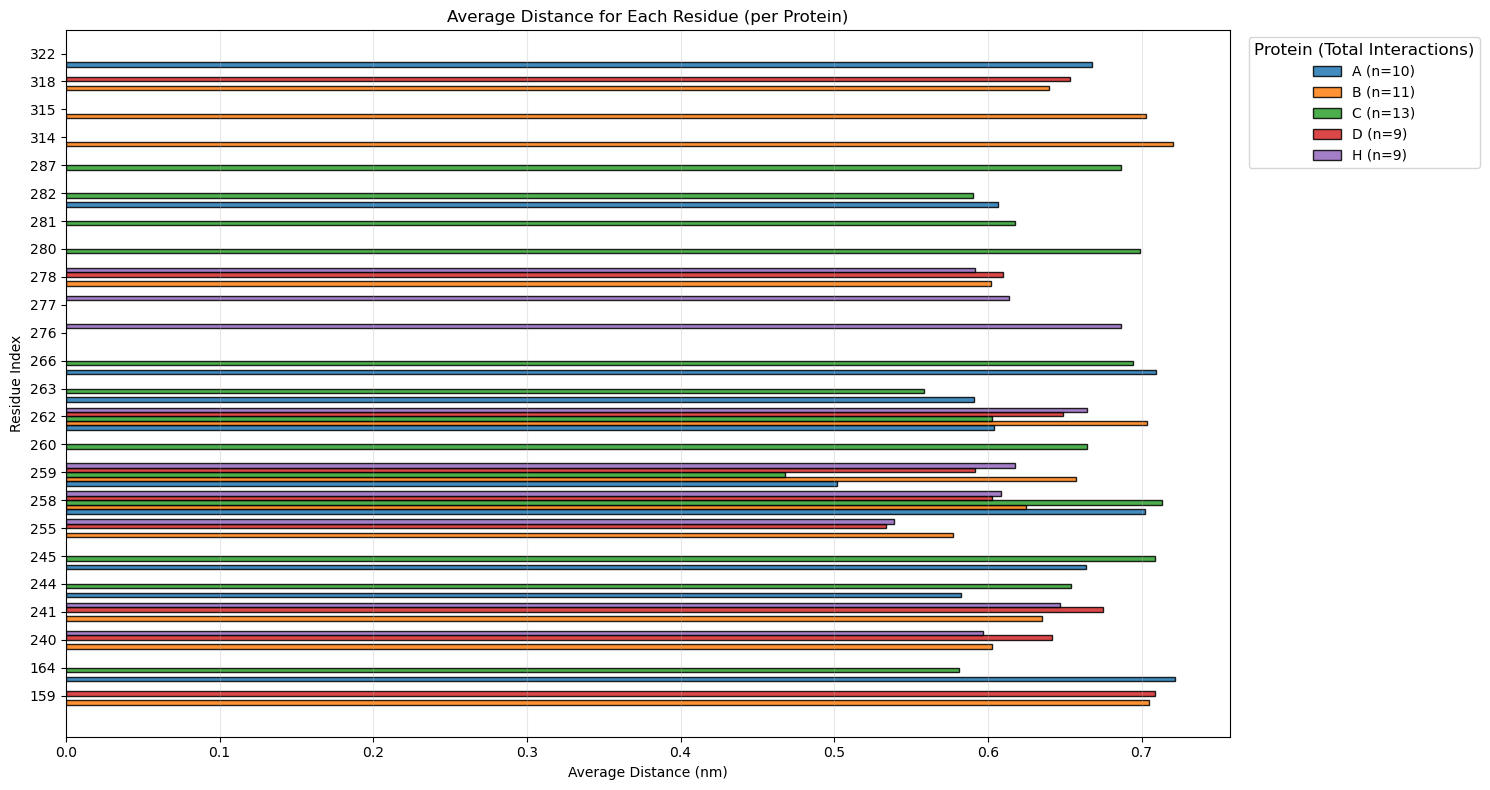

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of protein IDs and assign a color to each
protein_ids = list("abcdh")
protein_colors = plt.get_cmap('tab10').colors  # Up to 10 distinct colors

# Store data for plotting
protein_data = {}

# Collect all unique residue indices across all proteins
all_indices_set = set()

for i, pid in enumerate(protein_ids):
    csv_path = f"../../data/MD/chimeras_ADP/module2/{pid}_abtub_adpx2_gtpx2_mgx4_distance.csv"
    df = pd.read_csv(csv_path)
    time_col = df.columns[0]
    # Remove columns (except time) where any value exceeds 0.8
    cols_to_keep = [time_col] + [col for col in df.columns if col != time_col and df[col].max() <= 0.8]
    df = df[cols_to_keep]
    # Extract residue columns (assume all except time_col)
    residue_cols = [col for col in df.columns if col != time_col]
    # Try to extract residue indices from column names (e.g., "Kinesin_163_Distance_nm")
    def extract_index(col):
        import re
        match = re.search(r'(\d+)', col)
        if match:
            return int(match.group(1))
        else:
            return None
    residue_indices = [extract_index(col) for col in residue_cols]
    # Only keep columns with valid residue indices
    valid = [j for j, idx in enumerate(residue_indices) if idx is not None]
    residue_cols = [residue_cols[j] for j in valid]
    residue_indices = [residue_indices[j] for j in valid]
    # Sort by residue index for plotting
    sorted_pairs = sorted(zip(residue_indices, residue_cols))
    if not sorted_pairs:
        continue  # skip if no valid data
    sorted_indices, sorted_cols = zip(*sorted_pairs)
    # Calculate average distance for each residue
    avg_distances = [df[col].mean() for col in sorted_cols]
    protein_data[pid] = {
        "indices": np.array(sorted_indices),
        "avg_distances": np.array(avg_distances),
        "color": protein_colors[i % len(protein_colors)],
        "n_interactions": len(sorted_indices)
    }
    all_indices_set.update(sorted_indices)

# Sort all unique indices for consistent y-axis ordering
all_indices_sorted = sorted(all_indices_set)

# Create a mapping from residue index to y-tick position
index_to_y = {idx: i for i, idx in enumerate(all_indices_sorted)}

plt.figure(figsize=(15, 8))

bar_height = 0.8 / len(protein_data)  # Make bars thinner if many proteins

for i, (pid, pdata) in enumerate(protein_data.items()):
    # For each protein, plot bars at the y positions corresponding to its indices
    y_positions = [index_to_y[idx] + (i - len(protein_data)/2) * bar_height for idx in pdata["indices"]]
    plt.barh(
        y_positions,
        pdata["avg_distances"],
        height=bar_height,
        color=pdata["color"],
        alpha=0.85,
        label=f"{pid.upper()} (n={pdata['n_interactions']})",
        edgecolor='black'
    )

plt.xlabel('Average Distance (nm)')
plt.ylabel('Residue Index')
plt.title('Average Distance for Each Residue (per Protein)')

# Set y-ticks only at the indices that appear in the data
plt.yticks(
    range(len(all_indices_sorted)),
    [str(idx) for idx in all_indices_sorted]
)

plt.grid(True, axis='x', alpha=0.3)
plt.legend(title="Protein (Total Interactions)", fontsize='medium', title_fontsize='large', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()
